# Part C: Sampling from a binary Markov random field

The goal of this practical is to sample from a binary Markov random field. Once again we are going to use Gibbs sampling.  We select one dimension (pixel) at a time, and consider the conditional distribution of this pixel given all of the others. Then we sample from this distribution and repeat.

There are three things to implement for this part:
1. Computing the [cost function](#Pairwise-cost) $\psi$ between adjacent pixels in the MRF
2. [Evaluating](#Full-model) the probability of the MRF given label assignments for every pixel
3. Defining the [conditional distribution](#Gibbs-sampling) over labels of a specific pixel given all of the others
4. Sampling a pixel value from this distribution

Finally we will look at how this process can be made more efficient by avoiding unnecessary calculations

### Import modules

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random

from visualisation import display_image

# Define MRF model

### Grid connections
In this part we are using a pairwise Markov random field and so the cliques (subsets) consist of only neighbouring pairs in a regular grid structure. This utility method returns these neighbours for a given location, taking care of the boundary cases where a variable has fewer than four neighbours

In [2]:
def neighbours(i, j, arr):
    '''
    Function to get the neighbours of a particular cell in the grid
    Inputs:
     - i: Node coordinate 1
     - j: Node coordinate 2
     - arr: array containing the labels
    Output:
     - value: labels of the nodes in the neighbourhood returned as a generator
    '''
    height, width = arr.shape
    if i > 0:
        yield arr[i - 1, j]
    if i < height - 1:
        yield arr[i + 1, j]
    if j > 0:
        yield arr[i, j - 1]
    if j < width - 1:
        yield arr[i, j + 1]

### Pairwise cost
**TO DO:** For adjacent variables with label indices given by `label1` and `label2`, give the _cost_ of this assignment. Note that this cost function $\psi$ is different from a potential function $\phi$, but related by $\psi[\bullet] = -log[\phi[\bullet]]$.

In [3]:
def get_cost(label1, label2, mrf_costs):
    '''
    Function to compute the cost associated to two labels
    Inputs:
     - label1: label of node 1
     - label2: label of node 2 (node 2 should be in node 1's neighborhood)
     - mrf_costs: MRF costs stored in an array
    Outputs:
     - value: MRF cost of the couple of nodes with labels (label1,label2)
    '''
    # TO DO: replace this
    return  mrf_costs[label1,label2]

## Full model
**TO DO:** The total cost of the $\psi$ terms is already implemented. You can use this to calculate the probability of the Markov random field (up to the unknown scaling factor!)

In [4]:
class MarkovRandomField:
    '''
    Class to define a MRF object
    Attributes:
     - label: labels for each nodes.
     - cost: costs array for every pair configuration (0,0),(0,1),(1,0),(1,1)
    '''
    def __init__(self, shape, costs, num_labels=2):
        '''
        Object creation:
         - Shape: shape of the grid array ; each cell of this grid array being a specific node of the MRF
         - costs: costs array for every pair configuration (0,0),(0,1),(1,0),(1,1)
        '''
        self.label = np.random.randint(0, num_labels, shape)
        self.costs = np.array(costs)
        
    def probability(self):
        '''
        Method to return the probability of the MRF by scanning all cells of the grid
        '''
        #for label in range(1,self.label-1):
            #U = self.costs[label,label-1]+ self.costs[label,label+1] + self.costs[label-1,label] + self.costs[label+1,label];
        for (i, j), label in np.ndenumerate(self.label):
            for adjacent_label in neighbours(i, j, self.label):
                 U += get_cost(label,adjacent_label,self.costs)

        # TO DO: replace this
        
        return np.exp(-U)
    
    def __len__(self):
        return self.label.size

# Generate sample

In [5]:
shape = 20, 20
field = MarkovRandomField(shape, costs=[[0.001, 0.60], [0.60, 0.001]], num_labels=2)

### Gibbs sampling
As in the previous part, we are using Gibbs sampling to sample the label for a pixel given all of the others.

**TO DO:** For each of the possible labels (0 or 1) at a pixel location, we can evaluate the (unnormalised) probability of the MRF. Firstly, normalize the two probabilities so that they sum to one and therefore form a probability distribution. Secondly, sample from this Bernoulli distribution to assign a value of 0 or 1 to this pixel.

If you have got this right, the image should gradually become smooth.  Over time, the images are samples from the 20\*20 probability distribution over label fields.

KeyboardInterrupt: 

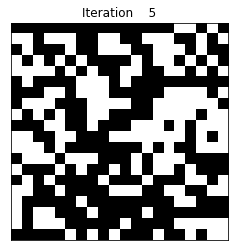

In [6]:
pixel_order = [np.unravel_index(i, shape) for i in range(len(field))]

for iteration in range(1000):
    random.shuffle(pixel_order)

    for n, (i, j) in enumerate(pixel_order):
        field.label[i, j] = 0
        prLabelEquals0 = field.probability()

        field.label[i, j] = 1
        prLabelEquals1 = field.probability()

        # TO DO: normalize the two probabilities so that they sum to one
        
        p0 = prLabelEquals0/(prLabelEquals0 + prLabelEquals1)
        p1 = prLabelEquals1/(prLabelEquals0 + prLabelEquals1)

        # TO DO: replace this

        field.label[i, j] = np.random.rand()> p0
        
        # Jupyter notebooks/matplotlib are quite slow for updating figures,
        # and so we only visualise every 50 here. Setting n=1 will show
        # every pixel update but will be significantly slower
        if n % 50 == 0:
            display_image(field.label, iteration)

## TO DO: Reduce unnecessary computation
Now look at the computation - for a site $w_n$ and sites $S$, almost all of the terms that you compute are the same for both $Pr(w_n=0|w_{S\setminus n})$ and $Pr(w_n=1|w_{S\setminus n})$ and hence they cancel when you normalize.  How would you re-implement this so that you
did not do all of this unnecessary compution?